In [1]:
using Scical

In [2]:
using PyPlot

In [29]:
using LsqFit

    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union(#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}, Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}}), Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:34.
To fix, define 
    insupport(_<:Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate, S<:Distributions.ValueSupport}, Distributions.Continuous}, Real)
before the new definition.
    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union(Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}}, #D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}), Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:35.
To fix,

In [4]:
function getFileInfo(name)
    fname = "$name.txt"
    bname = basename(name)
    infos = Float64[parse(Float64, v) for v in split(bname, '_')]
    info_len = length(infos)
    if info_len == 3
        if infos[2] != 0
            infos[2] = 1 / infos[2]
        end
    elseif info_len == 2
        push!(infos, 0)
    end
    return (fname, infos)
end

getFileInfo (generic function with 1 method)

In [6]:
names_589 = ["589/589_0", "589/589_2_-22", "589/589_2_-37", "589/589_2_-6.5",
             "589/589_2_8", "589/589_4_20", "589/589_4_-2.5", "589/589_4_42.5",
             "589/589_4_65", "589/589_4_86"];
infos_589 = Tuple[getFileInfo(name) for name in names_589]

10-element Array{Tuple,1}:
 ("589/589_0.txt",[589.0,0.0,0.0])       
 ("589/589_2_-22.txt",[589.0,0.5,-22.0]) 
 ("589/589_2_-37.txt",[589.0,0.5,-37.0]) 
 ("589/589_2_-6.5.txt",[589.0,0.5,-6.5]) 
 ("589/589_2_8.txt",[589.0,0.5,8.0])     
 ("589/589_4_20.txt",[589.0,0.25,20.0])  
 ("589/589_4_-2.5.txt",[589.0,0.25,-2.5])
 ("589/589_4_42.5.txt",[589.0,0.25,42.5])
 ("589/589_4_65.txt",[589.0,0.25,65.0])  
 ("589/589_4_86.txt",[589.0,0.25,86.0])  

In [55]:
function getData(finfo)
    data = readdlm(finfo[1], ' ', Float64)
    idxs = sortperm(data[:, 1])
    res = Array{Float64, 2}(size(data, 1), 3)
    res[:, 1:2] = data[idxs, :]
    for i in 1:size(data, 1)
        res[i, 3] = res[i, 2] * 0.015 + 0.001 # 15% + 1μW
    end
    return res
end

getData (generic function with 1 method)

In [33]:
function plotData(finfo, data)
    errorbar(data[:, 1], data[:, 2], data[:, 3])
    lamb, waveplate, angl = finfo[2]
    nplate = if waveplate == 0
        "None"
    elseif waveplate == 0.25
        "Quarter waveplate"
    elseif waveplate == 0.5
        "Half waveplate"
    else
        error("Unknown waveplate.")
    end
    title("\$$(Int(lamb))\$nm, $nplate @ \$$angl^\\circ\$")
end

function plotFile(finfo)
    data = getData(finfo)
    plotData(finfo, data)
    data
end

plotFile (generic function with 1 method)

In [34]:
function plotSingleData(finfo, data)
    figure()
    plotData(finfo, data)
    xlim([minimum(data[:, 1]) - 5, maximum(data[:, 1]) + 5])
    ylim([0, maximum(data[:, 2]) * 1.1])
end

function plotSingleFile(finfo)
    plotSingleData(finfo, getData(finfo))
end

plotSingleFile (generic function with 1 method)

In [52]:
model(x, p) = begin
    angl = x / 180 * 2π
    p[1] + p[2] * sin(angl) + p[3] * cos(angl)
end

function fitData(finfo, data)
    fit = curve_fit(model, data[:, 1], data[:, 2], 1 ./ data[:, 3].^2,
                    [mean(data[:, 2]), 0.0, 0.0])

    # We can estimate errors on the fit parameters,
    # to get 95% confidence error bars:
    errors = estimate_errors(fit, 0.95)
    (fit.param, errors)
end

fitData (generic function with 1 method)

In [70]:
function plotDataFit(finfo, data)
    param, errors = fitData(finfo, data)
    plotSingleData(finfo, data)
    xs = linspace(minimum(data[:, 1]) - 5, maximum(data[:, 1]) + 5, 1000)
    ys = model(xs, param)
    # ys1 = similar(ys)
    # ys2 = similar(ys)
    # for i in 1:length(xs)
    #     x = xs[i]
    #     angl = x / 180 * 2π
    #     s = abs(sin(angl))
    #     c = abs(cos(angl))
    #     e = errors[1] + errors[2] * s + errors[3] * c
    #     ys1[i] = ys[i] - e
    #     ys2[i] = ys[i] + e
    # end
    plot(xs, ys)
    # plot(xs, ys1)
    # plot(xs, ys2)
end

plotFileFit(finfo) = plotDataFit(finfo, getData(finfo))

plotFileFit (generic function with 1 method)

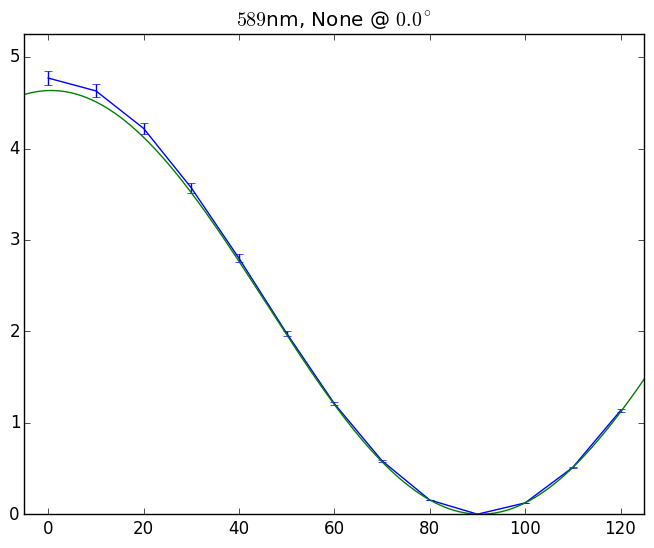

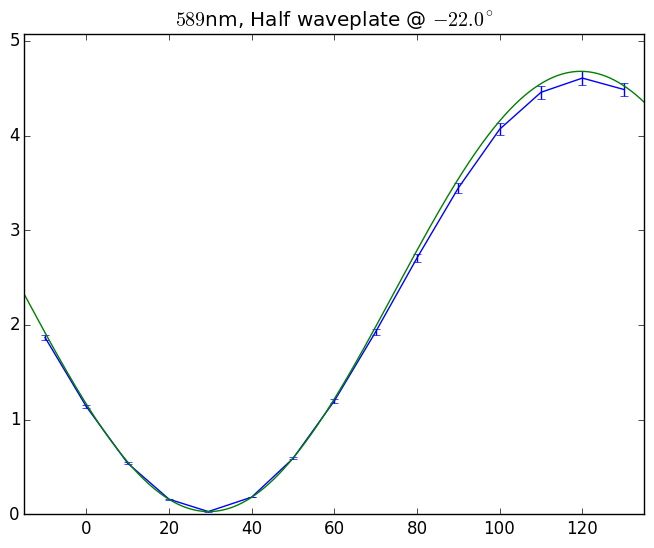

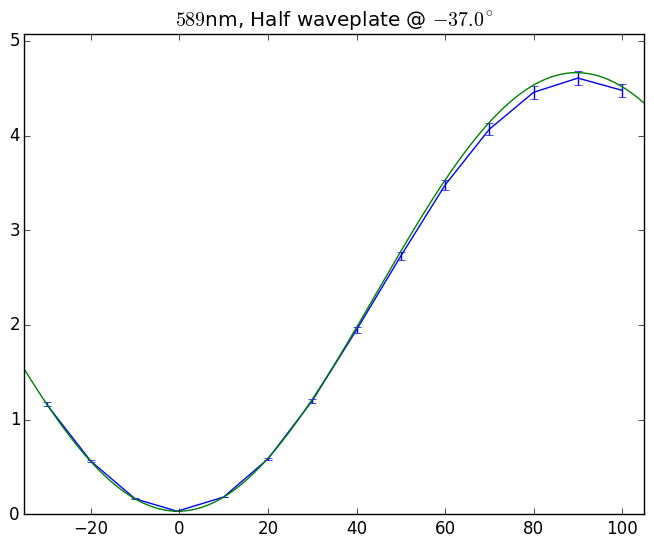

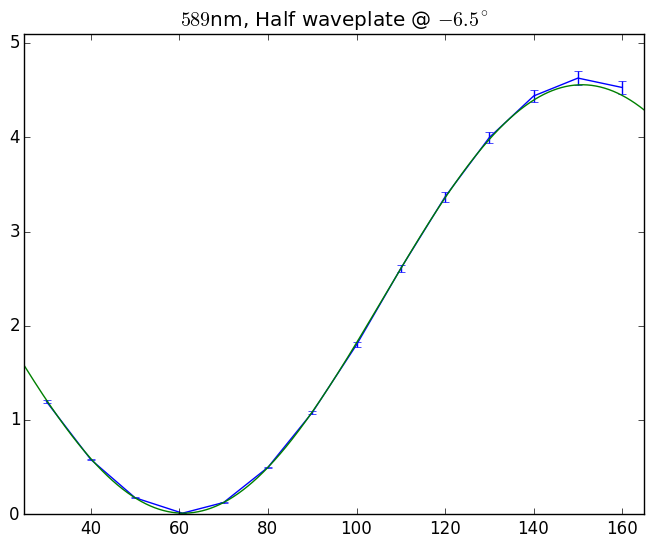

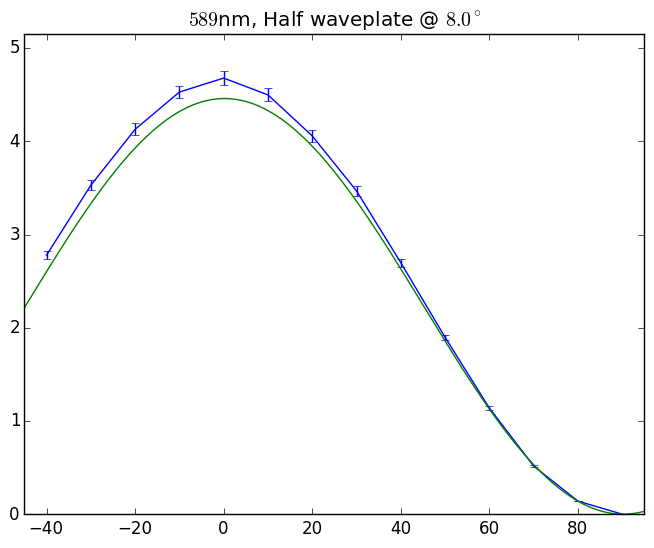

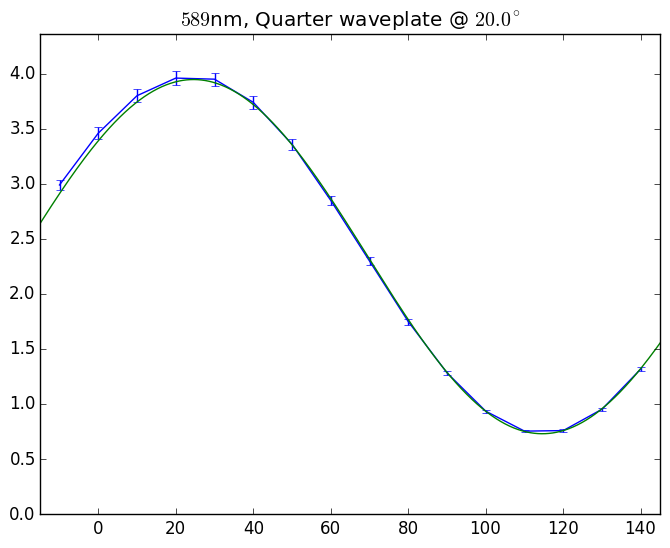

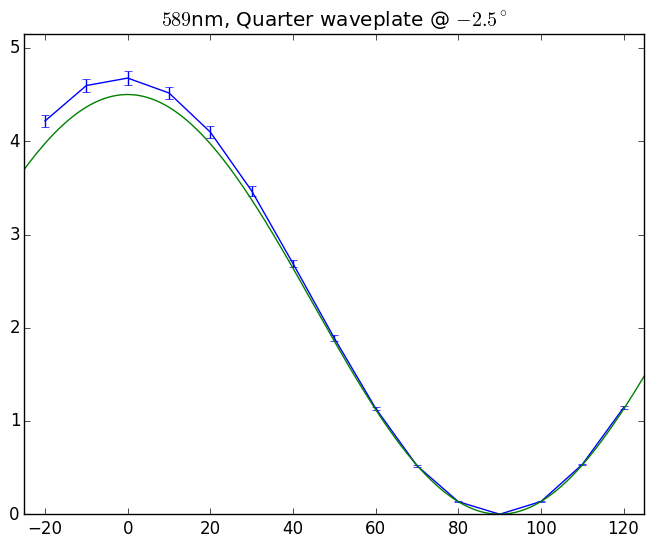

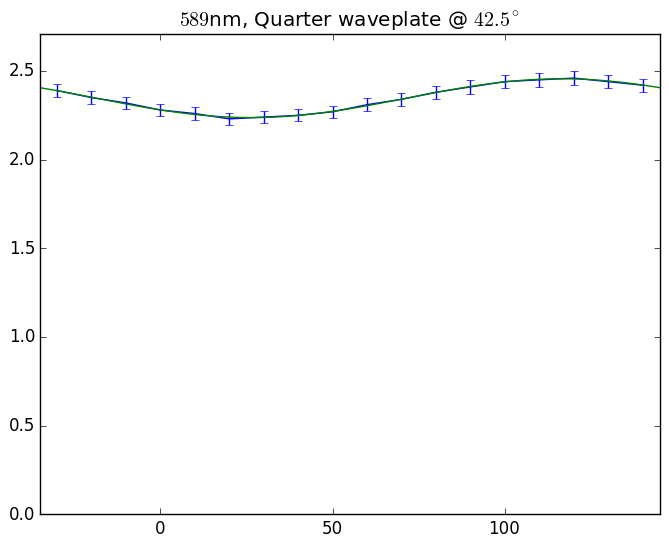

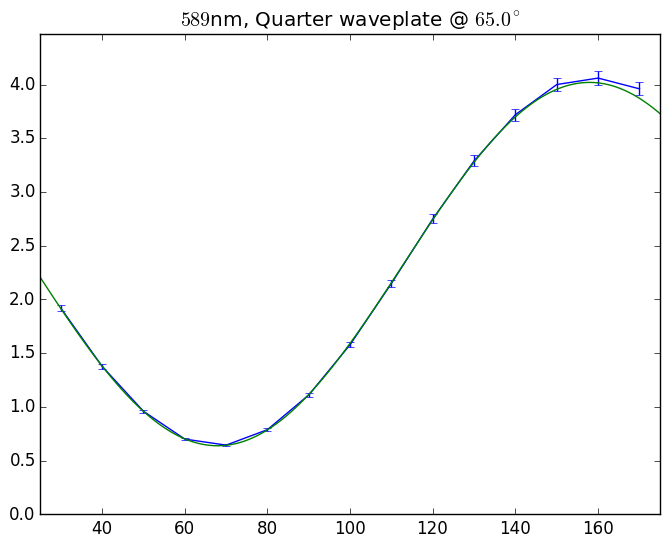

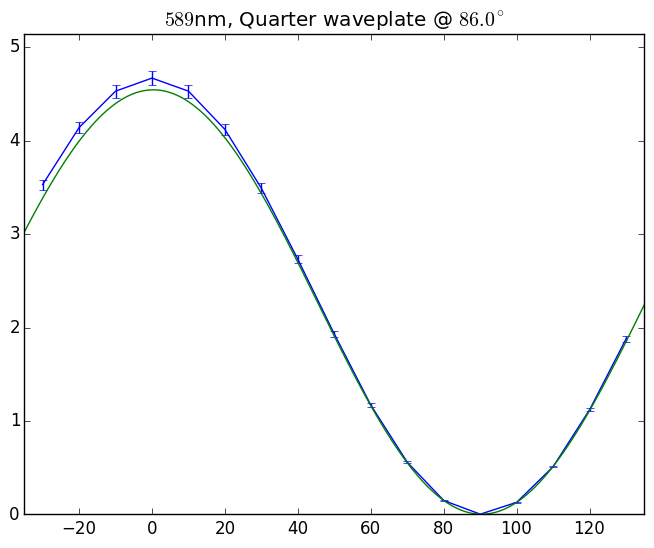

In [71]:
for finfo in infos_589
    plotFileFit(finfo)
end